<a href="https://colab.research.google.com/github/LucasDatilioCarderelli/Codenation/blob/master/Projeto_Final/PrjF_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Final Codenation

## Importing Files

In [ ]:
#Importando as bibliotecas básicas:
import pandas as pd
import numpy as np

# Para geração de gráficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import (
    LabelEncoder, KBinsDiscretizer)

from zipfile import ZipFile # Para abrir arquivos "zipados"
import gc

#Para setar o número de linhas e colunas visíveis no dataset
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
zip_file = ZipFile("/content/estaticos_market.csv.zip")
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
for text_file in zip_file.infolist() if text_file.filename.endswith('.csv')}
list(zip(dfs))

[('estaticos_market.csv',)]

In [ ]:
mkt = pd.DataFrame(dfs['estaticos_market.csv'])

port1 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio1.csv")
port2 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio2.csv")
port3 = pd.read_csv("https://codenation-challenges.s3-us-west-1.amazonaws.com/ml-leads/estaticos_portfolio3.csv")

mkt.shape, port1.shape, port2.shape, port3.shape

((462298, 182), (555, 182), (566, 2), (265, 2))

In [ ]:
# Reduzindo e convertendo dados para reduzir memória 
ints = mkt.select_dtypes(include=['int64','int32','int16']).columns
mkt[ints] = mkt[ints].apply(pd.to_numeric, downcast='integer')

floats = mkt.select_dtypes(include=['float']).columns
mkt[floats] = mkt[floats].apply(pd.to_numeric, downcast='float')

objects = mkt.select_dtypes('object').columns
mkt[objects] = mkt[objects].apply(lambda x: x.astype('category'))

mkt.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462298 entries, 0 to 462297
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(9), category(27), float32(144), int16(1), int32(1)
memory usage: 348.4 MB


In [ ]:
mkt.head()

,Unnamed: 0,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_empresa_anos,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_email,fl_telefone,fl_rm,nm_divisao,nm_segmento,fl_spa,fl_antt,fl_veiculo,vl_total_tancagem,vl_total_veiculos_antt,vl_total_veiculos_leves,vl_total_veiculos_pesados,fl_optante_simples,qt_art,vl_total_veiculos_pesados_grupo,vl_total_veiculos_leves_grupo,vl_total_tancagem_grupo,vl_total_veiculos_antt_grupo,vl_potenc_cons_oleo_gas,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,nu_meses_rescencia,de_nivel_atividade,de_indicador_telefone,fl_simples_irregular,vl_frota,empsetorcensitariofaixarendapopulacao,nm_meso_regiao,nm_micro_regiao,fl_passivel_iss,qt_socios,qt_socios_pf,qt_socios_pj,idade_media_socios,idade_maxima_socios,idade_minima_socios,qt_socios_st_regular,qt_socios_st_suspensa,qt_socios_masculino,qt_socios_feminino,qt_socios_pep,qt_alteracao_socio_total,qt_alteracao_socio_90d,qt_alteracao_socio_180d,qt_alteracao_socio_365d,qt_socios_pj_ativos,qt_socios_pj_nulos,qt_socios_pj_baixados,qt_socios_pj_suspensos,qt_socios_pj_inaptos,vl_idade_media_socios_pj,vl_idade_maxima_socios_pj,vl_idade_minima_socios_pj,qt_coligados,qt_socios_coligados,qt_coligados_matriz,qt_coligados_ativo,qt_coligados_baixada,qt_coligados_inapta,qt_coligados_suspensa,qt_coligados_nula,idade_media_coligadas,idade_maxima_coligadas,idade_minima_coligadas,coligada_mais_nova_ativa,coligada_mais_antiga_ativa,idade_media_coligadas_ativas,coligada_mais_nova_baixada,coligada_mais_antiga_baixada,idade_media_coligadas_baixadas,qt_coligados_sa,qt_coligados_me,qt_coligados_mei,qt_coligados_ltda,qt_coligados_epp,qt_coligados_norte,qt_coligados_sul,qt_coligados_nordeste,qt_coligados_centro,qt_coligados_sudeste,qt_coligados_exterior,qt_ufs_coligados,qt_regioes_coligados,qt_ramos_coligados,qt_coligados_industria,qt_coligados_agropecuaria,qt_coligados_comercio,qt_coligados_serviço,qt_coligados_ccivil,qt_funcionarios_coligados,qt_funcionarios_coligados_gp,media_funcionarios_coligados_gp,max_funcionarios_coligados_gp,min_funcionarios_coligados_gp,vl_folha_coligados,media_vl_folha_coligados,max_vl_folha_coligados,min_vl_folha_coligados,vl_folha_coligados_gp,media_vl_folha_coligados_gp,max_vl_folha_coligados_gp,min_vl_folha_coligados_gp,faturamento_est_coligados,media_faturamento_est_coligados,max_faturamento_est_coligados,min_faturamento_est_coligados,faturamento_est_coligados_gp,media_faturamento_est_coligados_gp,max_faturamento_est_coligados_gp,min_faturamento_est_coligados_gp,total_filiais_coligados,media_filiais_coligados,max_filiais_coligados,min_filiais_coligados,qt_coligados_atividade_alto,qt_coligados_atividade_medio,qt_coligados_atividade_baixo,qt_coligados_atividade_mt_baixo,qt_coligados_atividade_inativo,qt_coligadas,sum_faturamento_estimado_coligadas,de_faixa_faturamento_estimado,de_faixa_faturamento_estimado_grupo,vl_faturamento_estimado_aux,vl_faturamento_estimado_grupo_aux,qt_ex_funcionarios,qt_funcionarios_grupo,percent_func_genero_masc,percent_func_genero_fem,idade_ate_18,idade_de_19_a_23,idade_de_24_a_28,idade_de_29_a_33,idade_de_34_a_38,idade_de_39_a_43,idade_de_44_a_48,idade_de_49_a_53,idade_de_54_a_58,idade_acima_de_58,grau_instrucao_macro_analfabeto,grau_instrucao_macro_escolaridade_fundamental,grau_instrucao_macro_escolaridade_media,grau_instrucao_macro_escolaridade_superior,grau_instrucao_macro_desconhecido,total,meses_ultima_contratacaco,qt_admitidos_12meses,qt_desligados_12meses,qt_desligados,qt_admitidos,media_meses_servicos_all,max_meses_servicos_all,min_meses_servicos_all,media_meses_servicos,max_meses_servicos,min_meses_servicos,qt_funcionarios,qt_funcionarios_12meses,qt_funcionarios_24meses,tx_crescimento_12meses,tx_crescimento_24meses,tx_rotatividade,qt_filiais
0,0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,True,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,14.457534,10 a 15,False,Fal

## Droping columns

### Dropping useless columns

In [ ]:
try:
  mkt.drop("Unnamed: 0", axis=1, inplace=True)
  port1.drop("Unnamed: 0", axis=1, inplace=True)
  port2.drop("Unnamed: 0", axis=1, inplace=True)
  port3.drop("Unnamed: 0", axis=1, inplace=True)
except:
  print("Already droped")

In [ ]:
for col in mkt.columns:
  if mkt[col].notna().sum() == 0:
    print(col)
    mkt.drop(col, axis=1, inplace=True)

qt_alteracao_socio_total
qt_alteracao_socio_90d
qt_alteracao_socio_180d
qt_alteracao_socio_365d
grau_instrucao_macro_desconhecido


### Dropping columns with more than 50% of NA

In [ ]:
cols50na = []
for column in mkt.columns:
  if mkt[column].isna().sum() > (mkt.shape[0]*0.50):
    mkt.drop(column, axis=1, inplace=True)
    cols50na.append(column)
len(cols50na)

126

### Droping Unbalanced booleans columns

In [ ]:
for col in mkt.select_dtypes(bool).columns:
  if mkt[col].value_counts()[0] > mkt.shape[0]*.9:
    print(col)
    mkt.drop(col, axis=1)

fl_me
fl_sa
fl_epp
fl_ltda
fl_st_especial


In [ ]:
mkt.fl_simples_irregular.value_counts()

False    460030
True        341
Name: fl_simples_irregular, dtype: int64

### Dropping other columns

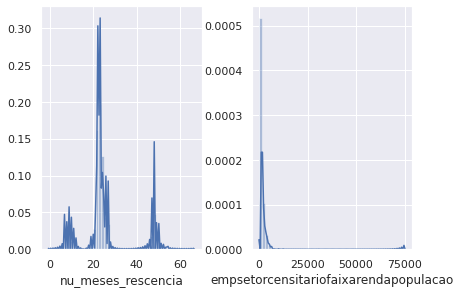

In [ ]:
fig, ax = plt.subplots(1,2)
plt.tight_layout()

sns.distplot(mkt.nu_meses_rescencia, ax=ax[0])
sns.distplot(mkt.empsetorcensitariofaixarendapopulacao, ax=ax[1]);

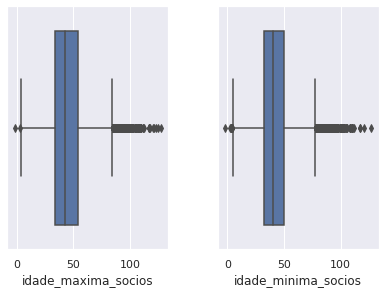

In [ ]:
fig, ax = plt.subplots(1,2)
plt.tight_layout()

sns.boxplot(mkt.idade_maxima_socios, ax=ax[0])
sns.boxplot(mkt.idade_minima_socios, ax=ax[1]);

In [ ]:
colstodrop = ["nu_meses_rescencia", "empsetorcensitariofaixarendapopulacao",
              "idade_maxima_socios", "idade_minima_socios", 
              # Unbalanced columns
              "fl_spa", "fl_simples_irregular", "fl_antt", "fl_veiculo",
              "vl_total_veiculos_pesados_grupo","vl_total_veiculos_leves_grupo",
              # The same as other columns
              "vl_faturamento_estimado_aux","vl_faturamento_estimado_grupo_aux",
              "idade_empresa_anos", "qt_socios_pf", "qt_socios_pj",
              "qt_socios_st_regular", "de_faixa_faturamento_estimado_grupo", 
              # Too many uniques
              "nm_micro_regiao", "nm_divisao",
              # Uselees right now
              "fl_email", "fl_telefone"]

for col in colstodrop:
  try:
    mkt.drop(col, axis=1, inplace=True)
    print(f'{col:<38} \t droped')
  except:
    print(f"{col:<38} \t already droped")

nu_meses_rescencia                     	 droped
empsetorcensitariofaixarendapopulacao  	 droped
idade_maxima_socios                    	 droped
idade_minima_socios                    	 droped
fl_spa                                 	 droped
fl_simples_irregular                   	 droped
fl_antt                                	 droped
fl_veiculo                             	 droped
vl_total_veiculos_pesados_grupo        	 droped
vl_total_veiculos_leves_grupo          	 droped
vl_faturamento_estimado_aux            	 droped
vl_faturamento_estimado_grupo_aux      	 droped
idade_empresa_anos                     	 droped
qt_socios_pf                           	 droped
qt_socios_pj                           	 droped
qt_socios_st_regular                   	 droped
de_faixa_faturamento_estimado_grupo    	 droped
nm_micro_regiao                        	 droped
nm_divisao                             	 droped
fl_email                               	 droped
fl_telefone                            	

In [ ]:
mkt.shape

(462298, 29)

## Filling NAN

In [ ]:
mkt.isna().sum()

id                                    0
fl_matriz                             0
de_natureza_juridica                  0
sg_uf                                 0
natureza_juridica_macro               0
de_ramo                               0
setor                              1927
idade_emp_cat                         0
fl_me                                 0
fl_sa                                 0
fl_epp                                0
fl_mei                                0
fl_ltda                               0
dt_situacao                           6
fl_st_especial                        0
fl_rm                                 0
nm_segmento                        1927
fl_optante_simples                82713
fl_optante_simei                  82713
sg_uf_matriz                       1939
de_saude_tributaria               14851
de_saude_rescencia                14851
de_nivel_atividade                11168
nm_meso_regiao                    58698
fl_passivel_iss                    1927


### Filling Float and Int

In [ ]:
num_col = mkt.columns.str.contains("qt_|tx_|idade_d|idade_a|vl_")
for n in range(0, len(mkt.columns)):
  if num_col[n] == True:
    mkt.iloc[:,n].fillna(0, inplace=True)

In [ ]:
mkt.idade_media_socios.fillna(mkt.idade_media_socios.mode()[0], inplace=True)

In [ ]:
mkt.select_dtypes(include="number").isna().sum()

qt_socios             0
idade_media_socios    0
qt_filiais            0
dtype: int64

### Filling Categories

In [ ]:
mkt.select_dtypes(include="category").isna().sum()

id                                   0
de_natureza_juridica                 0
sg_uf                                0
natureza_juridica_macro              0
de_ramo                              0
setor                             1927
idade_emp_cat                        0
dt_situacao                          6
fl_rm                                0
nm_segmento                       1927
fl_optante_simples               82713
fl_optante_simei                 82713
sg_uf_matriz                      1939
de_saude_tributaria              14851
de_saude_rescencia               14851
de_nivel_atividade               11168
nm_meso_regiao                   58698
fl_passivel_iss                   1927
de_faixa_faturamento_estimado    27513
dtype: int64

#### Dropping 1927 nan rows

In [ ]:
print(mkt.shape)
mkt = mkt[mkt["setor"].notna()]
print(mkt.shape)

(462298, 29)
(460371, 29)


#### Filling by 'mei'

In [ ]:
mkt.query("fl_optante_simei.isna() & qt_filiais == 0", engine='python').shape[0]

76849

In [ ]:
mkt["fl_optante_simei"].fillna(True, inplace=True)
mkt["fl_optante_simples"].fillna(False, inplace=True)

#### Search for unbalanceds columns

In [ ]:
# mkt.query("de_saude_tributaria.isna()", engine="python").head()
mkt.de_saude_tributaria.value_counts(), mkt.de_saude_rescencia.value_counts()

(VERDE       145430
 AZUL        105230
 AMARELO      91045
 CINZA        64019
 LARANJA      36116
 VERMELHO      5607
 Name: de_saude_tributaria, dtype: int64, ACIMA DE 1 ANO    378896
 ATE 1 ANO          38101
 SEM INFORMACAO     30425
 ATE 3 MESES           13
 ATE 6 MESES           12
 Name: de_saude_rescencia, dtype: int64)

In [ ]:
mkt.de_saude_rescencia.value_counts()[0] > mkt.shape[0]*.9

False

In [ ]:
for col in mkt.select_dtypes(include="category").columns:
  print(f"{mkt[col].value_counts()[0]}\t{col}")
  try: 
    if mkt[col].value_counts()[0] > mkt.shape[0]*.9:
      print(f"{col}\tDrop")
  except: 
    print(mkt[col].value_counts())

1	id
29690	de_natureza_juridica
20439	sg_uf
2909	natureza_juridica_macro
2754	de_ramo
3247	setor
138580	idade_emp_cat
1	dt_situacao
235805	fl_rm
2754	nm_segmento


RecursionError: ignored

260754	fl_optante_simples


Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


RecursionError: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


RecursionError: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


285545	fl_optante_simei


RecursionError: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


20028	sg_uf_matriz
91045	de_saude_tributaria
378896	de_saude_rescencia
152245	de_nivel_atividade
7845	nm_meso_regiao


RecursionError: ignored

Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


195630	fl_passivel_iss


RecursionError: ignored

21	de_faixa_faturamento_estimado


Exception ignored in: 'pandas._libs.lib.c_is_list_like'
Traceback (most recent call last):
  File "/usr/lib/python3.6/abc.py", line 184, in __instancecheck__
    if subclass in cls._abc_cache:
RecursionError: maximum recursion depth exceeded while calling a Python object


In [ ]:
mkt.de_faixa_faturamento_estimado.value_counts()

DE R$ 81.000,01 A R$ 360.000,00             271959
ATE R$ 81.000,00                             98558
DE R$ 360.000,01 A R$ 1.500.000,00           46203
DE R$ 1.500.000,01 A R$ 4.800.000,00         10152
DE R$ 4.800.000,01 A R$ 10.000.000,00         2150
DE R$ 10.000.000,01 A R$ 30.000.000,00        1445
SEM INFORMACAO                                1173
DE R$ 30.000.000,01 A R$ 100.000.000,00        871
DE R$ 100.000.000,01 A R$ 300.000.000,00       253
DE R$ 300.000.000,01 A R$ 500.000.000,00        48
DE R$ 500.000.000,01 A 1 BILHAO DE REAIS        27
ACIMA DE 1 BILHAO DE REAIS                      21
Name: de_faixa_faturamento_estimado, dtype: int64

#### Filling with mode

In [ ]:
for col in mkt.select_dtypes(include="category").columns:
  mkt[col].fillna(mkt[col].mode()[0], inplace=True)

---

In [ ]:
mkt.isna().sum()

id                               0
fl_matriz                        0
de_natureza_juridica             0
sg_uf                            0
natureza_juridica_macro          0
de_ramo                          0
setor                            0
idade_emp_cat                    0
fl_me                            0
fl_sa                            0
fl_epp                           0
fl_mei                           0
fl_ltda                          0
dt_situacao                      0
fl_st_especial                   0
fl_rm                            0
nm_segmento                      0
fl_optante_simples               0
fl_optante_simei                 0
sg_uf_matriz                     0
de_saude_tributaria              0
de_saude_rescencia               0
de_nivel_atividade               0
nm_meso_regiao                   0
fl_passivel_iss                  0
qt_socios                        0
idade_media_socios               0
de_faixa_faturamento_estimado    0
qt_filiais          

## Reducing the DataFrame's memory

In [ ]:
mkt.replace({True:1, False:0}, inplace=True)

In [ ]:
# Convertendo dados flutuantes em inteiro

for col in mkt.select_dtypes(include="number").columns:
  mkt[col] = mkt[col].astype("int16")

In [ ]:
mkt.select_dtypes(include="number").head(3)

,fl_matriz,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,fl_st_especial,fl_optante_simples,fl_optante_simei,fl_passivel_iss,qt_socios,idade_media_socios,qt_filiais
0,1,0,0,0,0,0,0,1,0,1,2,44,0
1,1,0,0,0,1,0,0,0,1,1,1,27,0
2,1,0,0,0,1,0,0,1,1,1,1,32,0


In [ ]:
mkt.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460371 entries, 0 to 462297
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   id                             460371 non-null  category
 1   fl_matriz                      460371 non-null  int16   
 2   de_natureza_juridica           460371 non-null  category
 3   sg_uf                          460371 non-null  category
 4   natureza_juridica_macro        460371 non-null  category
 5   de_ramo                        460371 non-null  category
 6   setor                          460371 non-null  category
 7   idade_emp_cat                  460371 non-null  category
 8   fl_me                          460371 non-null  int16   
 9   fl_sa                          460371 non-null  int16   
 10  fl_epp                         460371 non-null  int16   
 11  fl_mei                         460371 non-null  int16   
 12  fl_ltda         

## Some Analysis

In [ ]:
# mkt.qt_socios_pj.unique(), mkt.qt_socios_pf.unique(), mkt.qt_socios.unique()

---

In [ ]:
# Observar se os faturamentos da empresa e grupo são diferentes. re:yes
#mkt[["de_faixa_faturamento_estimado","de_faixa_faturamento_estimado_grupo"]].isna().sum()
#for n in range(0, mkt.shape[0]):
#  if mkt.de_faixa_faturamento_estimado[n] != mkt.de_faixa_faturamento_estimado_grupo[n]:
#    (mkt.de_faixa_faturamento_estimado[n], mkt.de_faixa_faturamento_estimado_grupo[n])

In [ ]:
# mkt.de_faixa_faturamento_estimado.unique(), mkt.de_faixa_faturamento_estimado_grupo.unique()

---

In [ ]:
# port1.query("fl_email==0 & fl_telefone==0").shape, port2.query("fl_email==0 & fl_telefone==0").shape, port3.query("fl_email==0 & fl_telefone==0").shape

In [ ]:
# mkt.qt_socios_st_regular.unique(), mkt.qt_socios.unique()

In [ ]:
mkt

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_rm,nm_segmento,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,fl_passivel_iss,qt_socios,idade_media_socios,de_faixa_faturamento_estimado,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,SOCIEDADE EMPRESARIA LIMITADA,RN,ENTIDADES EMPRESARIAIS,INDUSTRIA DA CONSTRUCAO,CONSTRUÇÃO CIVIL,10 a 15,0,0,0,0,0,2005-03-25,0,SIM,CONSTRUCAO,1,0,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,1,2,44,"DE R$ 1.500.000,01 A R$ 4.800.000,00",0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS DE ALOJAMENTO/ALIMENTACAO,SERVIÇO,1 a 5,0,0,0,1,0,2017-05-12,0,SIM,ALOJAMENTO E ALIMENTACAO,0,1,PI,CINZA,ATE 1 ANO,BAIXA,CENTRO NORTE PIAUIENSE,1,1,27,"DE R$ 81.000,01 A R$ 360.000,00",0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,EMPRESARIO INDIVIDUAL,AM,OUTROS,"TRANSPORTE, ARMAZENAGEM E CORREIO",SERVIÇO,5 a 10,0,0,0,1,0,2011-09-26,0,SIM,TRANSPORTE ARMAZENAGEM E CORREIO,1,1,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,1,1,32,"ATE R$ 81.000,00",0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,EMPRESARIO INDIVIDUAL,AM,OUTROS,SERVICOS DIVERSOS,SERVIÇO,5 a 10,0,0,0,0,0,2012-04-25,0,SIM,OUTRAS ATIVIDADES DE SERVICOS,1,0,AM,AMARELO,ACIMA DE 1 ANO,MEDIA,CENTRO AMAZONENSE,1,1,36,"DE R$ 81.000,01 A R$ 360.000,00",0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,EMPRESARIO INDIVIDUAL,RN,OUTROS,"SERVICOS PROFISSIONAIS, TECNICOS E CIENTIFICOS",SERVIÇO,1 a 5,0,0,0,0,0,2015-08-17,0,SIM,ATIVIDADES PROFISSIONAIS CIENTIFICAS E TECNICAS,1,0,RN,VERDE,ACIMA DE 1 ANO,ALTA,LESTE POTIGUAR,1,1,36,"DE R$ 81.000,01 A R$ 360.000,00",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,1,EMPRESARIO INDIVIDUAL,RN,OUTROS,COMERCIO E REPARACAO DE VEICULOS,COMERCIO,1 a 5,0,0,0,1,0,2015-07-28,0,NAO,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,1,1,RN,VERDE,ACIMA DE 1 ANO,ALTA,AGRESTE POTIGUAR,0,1,31,"ATE R$ 81.000,00",0
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,1,EMPRESARIO INDIVIDUAL,PI,OUTROS,SERVICOS ADMINISTRATIVOS,SERVIÇO,5 a 10,0,0,0,0,0,2009-11-16,0,SIM,ATIVIDADES ADMINISTRATIVAS E SERVICOS COMPLEME...,0,0,PI,LARANJA,ACIMA DE 1 ANO,MUITO BAIXA,CENTRO NORTE PIAUIENSE,1,0,36,"DE R$ 81.000,01 A R$ 360.000,00",0
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,1,ASSOCIACAO PRIVADA,MA,ENTIDADES SEM FINS LUCRATIVOS,SERVICOS DE SAUDE,SERVIÇO,> 20,0,0,0,0,0,2005-11-03,0,SIM,SAUDE HUMANA E SERVICOS SOCIAIS,0,0,MA,AMARELO,ACIMA DE 1 ANO,MEDIA,NORTE MARANHENSE,1,1,74,"DE R$ 81.000,01 A R$ 360.000,00",0
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,1,SOCIEDADE EMPRESARIA LIMITADA,RO,ENTIDADES EMPRESARIAIS,COMERCIO VAREJISTA,COMERCIO,1 a 5,0,0,0,0,0,2016-11-30,0,NAO,COMERCIO; REPARACAO DE VEICULOS AUTOMOTORES E ...,0,0,RO,VERDE,ACIMA DE 1 ANO,ALTA,CENTRO AMAZONENSE,0,5,31,"DE R$ 360.000,01 A R$ 1.500.000,00",0


### Fixing socios' age data

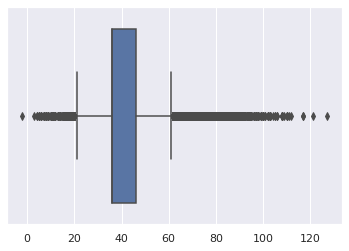

In [ ]:
# Devo remover os outliers?
sns.boxplot(pd.DataFrame(mkt["idade_media_socios"].round(0)));

In [ ]:
# How could it be posible?!
# mkt.query(""" idade_media_socios > 58 & (idade_acima_de_58 < 1 | idade_acima_de_58 != idade_acima_de_58)
#           """)["idade_media_socios"].round(0).value_counts().sum()

In [ ]:
print(f"Isso equivale a {33885*100/mkt.shape[0]:.2f}%")

Isso equivale a 7.36%


In [ ]:
q1, q2, q3 = mkt.idade_media_socios.quantile([0.25, 0.5, 0.75])
IQR = q3 - q1
int_sup = IQR * 1.5 + q3
int_inf = q1 - IQR * 1.5
int_sup, int_inf

(61.0, 21.0)

In [ ]:
mkt.loc[mkt["idade_media_socios"] > int_sup, "idade_media_socios"] = mkt.idade_media_socios.median()
mkt.loc[mkt["idade_media_socios"] < int_inf, "idade_media_socios"] = mkt.idade_media_socios.median()

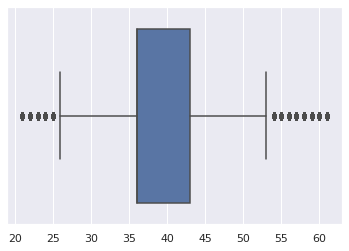

In [ ]:
sns.boxplot(pd.DataFrame(mkt["idade_media_socios"].round(0)));

---

In [ ]:
mkt.dt_situacao = pd.DatetimeIndex(mkt.dt_situacao).year
mkt.dt_situacao

0         2005
1         2017
2         2011
3         2012
4         2015
          ... 
462293    2015
462294    2009
462295    2005
462296    2016
462297    2018
Name: dt_situacao, Length: 460371, dtype: int64

## Bin continuous data into intervals

In [ ]:
X = mkt.copy()

In [ ]:
colsToBin = ["dt_situacao", "idade_media_socios", "qt_socios"]
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X[colsToBin] = est.fit_transform(X[colsToBin]).astype(int)

### Enconding

In [ ]:
cat_cols = X.select_dtypes(include="category").columns[1:]
cat_cols

Index(['de_natureza_juridica', 'sg_uf', 'natureza_juridica_macro', 'de_ramo',
       'setor', 'idade_emp_cat', 'fl_rm', 'nm_segmento', 'sg_uf_matriz',
       'de_saude_tributaria', 'de_saude_rescencia', 'de_nivel_atividade',
       'nm_meso_regiao', 'de_faixa_faturamento_estimado'],
      dtype='object')

In [ ]:
X[cat_cols] = X[cat_cols].apply(lambda col: LabelEncoder().fit_transform(col))
X

,id,fl_matriz,de_natureza_juridica,sg_uf,natureza_juridica_macro,de_ramo,setor,idade_emp_cat,fl_me,fl_sa,fl_epp,fl_mei,fl_ltda,dt_situacao,fl_st_especial,fl_rm,nm_segmento,fl_optante_simples,fl_optante_simei,sg_uf_matriz,de_saude_tributaria,de_saude_rescencia,de_nivel_atividade,nm_meso_regiao,fl_passivel_iss,qt_socios,idade_media_socios,de_faixa_faturamento_estimado,qt_filiais
0,a6984c3ae395090e3bee8ad63c3758b110de096d5d8195...,1,59,4,2,11,2,1,0,0,0,0,0,4,0,1,10,1,0,19,4,0,0,6,1,0,2,2,0
1,6178f41ade1365e44bc2c46654c2c8c0eaae27dcb476c4...,1,17,3,5,20,4,0,0,0,0,1,0,4,0,1,3,0,1,16,2,1,1,4,1,0,0,10,0
2,4a7e5069a397f12fdd7fd57111d6dc5d3ba558958efc02...,1,17,1,5,31,4,3,0,0,0,1,0,4,0,1,20,1,1,2,0,0,2,2,1,0,1,1,0
3,3348900fe63216a439d2e5238c79ddd46ede454df7b9d8...,1,17,1,5,24,4,3,0,0,0,0,0,4,0,1,17,1,0,2,0,0,2,2,1,0,1,10,0
4,1f9bcabc9d3173c1fe769899e4fac14b053037b953a1e4...,1,17,4,5,26,4,0,0,0,0,0,0,4,0,1,8,1,0,19,4,0,0,6,1,0,1,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462293,469ee5fc984d0bb60aa2f40cda4d003d7c9b963d149ed3...,1,17,4,5,3,1,0,0,0,0,1,0,4,0,0,9,1,1,19,4,0,0,0,0,0,1,1,0
462294,656f496e7e2fad708f0022d8ad97d2cb9344e839a5f3cb...,1,17,3,5,19,4,3,0,0,0,0,0,4,0,1,5,0,0,16,3,0,3,4,1,0,1,10,0
462295,9b933a5cf2149d1338f00fb459d34a16b9b0f2e8d3e8e1...,1,0,2,3,23,4,5,0,0,0,0,0,4,0,1,18,0,0,9,0,0,2,8,1,0,1,10,0
462296,84db0f17467cf4f02439e01ade57150b6ac59d9dae53ed...,1,59,5,2,5,1,0,0,0,0,0,0,4,0,0,9,0,0,20,4,0,0,2,0,0,1,7,0


In [ ]:
X.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460371 entries, 0 to 462297
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   id                             460371 non-null  category
 1   fl_matriz                      460371 non-null  int16   
 2   de_natureza_juridica           460371 non-null  int64   
 3   sg_uf                          460371 non-null  int64   
 4   natureza_juridica_macro        460371 non-null  int64   
 5   de_ramo                        460371 non-null  int64   
 6   setor                          460371 non-null  int64   
 7   idade_emp_cat                  460371 non-null  int64   
 8   fl_me                          460371 non-null  int16   
 9   fl_sa                          460371 non-null  int16   
 10  fl_epp                         460371 non-null  int16   
 11  fl_mei                         460371 non-null  int16   
 12  fl_ltda         

## Trying PCA

## Geting the ID's

In [ ]:
port1 = port1[["id"]]
port2 = port2[["id"]]
port3 = port3[["id"]]

X.shape, port1.shape, port2.shape, port3.shape

In [ ]:
port1 = port1.merge(right=X, how="inner", on="id")
port2 = port2.merge(right=X, how="inner", on="id")
port3 = port3.merge(right=X, how="inner", on="id")

port1.shape, port2.shape, port3.shape

((555, 28), (566, 28), (265, 28))

## Exporting CSV

In [ ]:
mkt.to_csv("mkt", index=False)

X.to_csv("mktX", index=False)

port1.to_csv("port1", index=False)
port2.to_csv("port2", index=False)
port3.to_csv("port3", index=False)

# GarbageCollector

In [ ]:
trash = 0

In [ ]:
trash += gc.collect()
trash

5401